As shown in `fill_quota.ipynb`, the theses of all three repositories contain referees, whereas only depositonce has a maintained list of advisors. Therefore, referees could be used as a substitute for venues.

In [55]:
import json
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np

In [10]:
tu = json.load(open('../../../data/processed/dim/depositonce.json'))
hu = json.load(open('../../../data/processed/dim/edoc.json'))
fu = json.load(open('../../../data/processed/dim/refubium.json'))

In [11]:
authors = {'TU': {'total': 0, 'distinct': 0}, 'HU': {'total': 0, 'distinct': 0}, 'FU': {'total': 0, 'distinct': 0}}
seen_authors = {'TU': [], 'HU': [], 'FU': []}
nulls = {'TU': 0, 'HU': 0, 'FU': 0}
totals = {'TU': 0, 'HU': 0, 'FU': 0}
repos = ['TU', 'HU', 'FU']
for i, repo in enumerate([tu, hu, fu]):
    for doc in repo:
        totals[repos[i]] += 1
        has_author = False
        for author in doc['authors']:
            if author[1] == 'author':
                has_author = True
                authors[repos[i]]['total'] += 1
                if author[0] not in seen_authors[repos[i]]:
                    authors[repos[i]]['distinct'] += 1
                    seen_authors[repos[i]].append(author[0])
        if not has_author:
            nulls[repos[i]] += 1

In [12]:
for repo in authors:
    print(f'{repo} has {authors[repo]["total"]} authors, {authors[repo]["distinct"]} distinct ones. {nulls[repo]} documents do not have an author ({round(nulls[repo]/totals[repo], 2)}).')

TU has 21705 authors, 13196 distinct ones. 63 documents do not have an author (0.01).
HU has 15548 authors, 10113 distinct ones. 0 documents do not have an author (0.0).
FU has 57812 authors, 36309 distinct ones. 144 documents do not have an author (0.01).


Check in how many documents each author occurs.

In [13]:
people = {'TU': {}, 'HU': {}, 'FU': {}}
for i, repo in enumerate([tu, hu, fu]):
    for doc in repo:
        for author in doc['authors']:
            if author[1] == 'author':
                if author[0] in people[repos[i]]:
                    people[repos[i]][author[0]] += 1
                else:
                    people[repos[i]][author[0]] = 1

In [14]:
for repo in people:
    if len(people[repo]) > 0:
        print(f'{repo} avg.: {round(sum(people[repo].values())/len(people[repo]), 2)}')
    else:
        print(f'{repo} avg.: 0')

TU avg.: 1.64
HU avg.: 1.54
FU avg.: 1.59


In [15]:
sorted_people = {'TU': {}, 'HU': {}, 'FU': {}}
for repo in sorted_people:
    sorted_people[repo] = {person: n for person, n in sorted(people[repo].items(), key=lambda item: item[1], reverse=True)}

In [16]:
for repo in sorted_people:
    print(repo)
    cnt = 0
    for key in sorted_people[repo]:
        print(key, sorted_people[repo][key])
        cnt += 1
        if cnt == 5:
            print()
            break

TU
Nagel, Kai 143
Juurlink, Ben 73
Popov, Valentin L. 66
Neubauer, Peter 56
Finkbeiner, Matthias 48

HU
Härdle, Wolfgang 143
Geiser, Jürgen 61
Härdle, Wolfgang Karl 60
Seadle, Michael 57
Güth, Werner 45

FU
Haag, Rainer 92
Eisert, Jens 73
Rillig, Matthias C. 71
Netz, Roland R. 65
Paul, Friedemann 56



In [19]:
(207 / sum(totals.values())) *100

0.704105581822511

In [20]:
sum(totals.values())

29399

In [22]:
groups = {'thesis': {'TU': {}, 'HU': {}, 'FU': {}}, 'publication': {'TU': {}, 'HU': {}, 'FU': {}}}
for i, repo in enumerate([tu, hu, fu]):
    for doc in repo:
        for author in doc['authors']:
            if author[1] == 'author':
                if author[0] in groups[doc['type'][1]][repos[i]]:
                    groups[doc['type'][1]][repos[i]][author[0]] += 1
                else:
                    groups[doc['type'][1]][repos[i]][author[0]] = 1


In [34]:
counters = {}
for key in groups:
    counters[key] = {}
    for subkey in groups[key]:
        counters[key][subkey] = Counter(groups[key][subkey].values())

In [48]:
max_number = 143  # as seen above: the no. of publications of Nagel, Kai.
x = range(1, max_number+1)
y = {}
for key in groups:
    y[key] = {}
    for subkey in groups[key]:
        y[key][subkey] = []
        for n in x:
            y[key][subkey].append(counters[key][subkey][n])

In [63]:
x_shortened = [str(n) for n in range(1, 11)]
x_shortened[-1] += '+'
y_shortened = {}  # add all values further than 9
for key in groups:
    y_shortened[key] = {}
    for subkey in groups[key]:
        y_shortened[key][subkey] = []
        for n in range(1, 10):
            y_shortened[key][subkey].append(counters[key][subkey][n])
        y_sum = 0
        for n in range(10, len(x)):
            y_sum += counters[key][subkey][n]
        y_shortened[key][subkey].append(y_sum)
        y_shortened[key][subkey] = np.array(y_shortened[key][subkey])

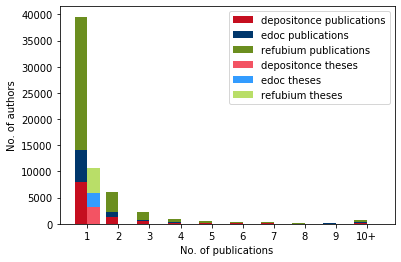

In [74]:
width=.4
x_array = np.arange(1, 11)
plt.bar(x_array - width/2, y_shortened['publication']['TU'], label='depositonce publications', width=width, color='#c50e1f')
plt.bar(x_array - width/2, y_shortened['publication']['HU'], label='edoc publications', width=width, color='#00376c', bottom=y_shortened['publication']['TU'])
plt.bar(x_array - width/2, y_shortened['publication']['FU'], label='refubium publications', width=width, color='#6b8e1f', bottom=y_shortened['publication']['HU']+y_shortened['publication']['TU'])
plt.bar(x_array + width/2, y_shortened['thesis']['TU'], label='depositonce theses', width=width, color='#F35363')
plt.bar(x_array + width/2, y_shortened['thesis']['HU'], label='edoc theses', width=width, color='#339CFF', bottom=y_shortened['thesis']['TU'])
plt.bar(x_array + width/2, y_shortened['thesis']['FU'], label='refubium theses', width=width, color='#B9DE68', bottom=y_shortened['thesis']['HU']+y_shortened['thesis']['TU'])
plt.xticks(x_array, x_shortened)
plt.legend()
plt.xlabel('No. of publications')
plt.ylabel('No. of authors')
plt.show()

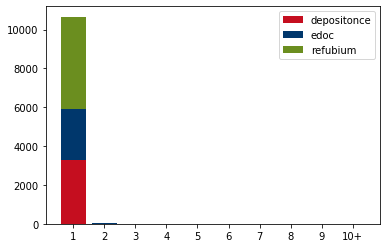

In [65]:
plt.bar(range(1, 11), y_shortened['thesis']['TU'], label='depositonce', color='#c50e1f')
plt.bar(range(1, 11), y_shortened['thesis']['HU'], label='edoc', color='#00376c', bottom=y_shortened['thesis']['TU'])
plt.bar(range(1, 11), y_shortened['thesis']['FU'], label='refubium', color='#6b8e1f', bottom=y_shortened['thesis']['HU']+y_shortened['thesis']['TU'])
plt.xticks(range(1, 11), x_shortened)
plt.legend()
plt.show()